**Implemented By Muhammad Hanan Asghar**

In [1]:
%tensorflow_version 1.x

import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 57779, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 57779 (delta 89), reused 119 (delta 15), pack-reused 57578
Receiving objects: 100% (57779/57779), 573.00 MiB | 32.47 MiB/s, done.
Resolving deltas: 100% (40029/40029), done.


In [ ]:
import shutil
shutil.make_archive("models", 'zip', "/content/models")
!cp "/content/models.zip" "/content/drive/MyDrive"

In [ ]:
!unzip /content/drive/MyDrive/models.zip -d /content/models

##Protobuf Compilation

In [8]:
%cd "/content/models/research"

/content/models/research


In [9]:
!protoc object_detection/protos/*.proto --python_out=.

##Settings

In [10]:
cp object_detection/packages/tf1/setup.py .

In [ ]:
!python -m pip install --upgrade pip

In [ ]:
!python -m pip install --use-feature=2020-resolver .

In [ ]:
!python object_detection/builders/model_builder_tf1_test.py

##Training and Configrations

In [20]:
%cd "/content"

/content


In [ ]:
!unzip "/content/drive/MyDrive/object-detection.zip"

In [ ]:
%cd "/content/object-detection"

/content/object-detection


In [ ]:
!python generate_tfrecord.py --csv_input=data/train_labels.csv  --output_path=data/train.record --image_dir=images/train/

In [ ]:
!python generate_tfrecord.py --csv_input=data/test_labels.csv  --output_path=data/test.record --image_dir=images/test/     

In [ ]:
!cp "/content/object-detection/data/train.record" "/content/drive/MyDrive/record_files"
!cp "/content/object-detection/data/test.record" "/content/drive/MyDrive/record_files"

##Configration Files

In [ ]:
%cd /content

/content


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_11_06_2017.tar.gz

In [ ]:
!wget https://github.com/tensorflow/models/blob/master/research/object_detection/samples/configs/ssd_mobilenet_v1_pets.config

In [ ]:
!cp "/content/ssd_mobilenet_v1_coco_11_06_2017.tar.gz" "/content/drive/MyDrive/record_files"

In [ ]:
!cp "/content/ssd_mobilenet_v1_pets.config" "/content/drive/MyDrive/record_files"

In [ ]:
!cp "/content/ssd_mobilenet_v1_coco_11_06_2017.tar.gz" "/content/object-detection"
!cp "/content/ssd_mobilenet_v1_pets.config" "/content/object-detection"

In [ ]:
%cd "/content/object-detection"

/content/object-detection


In [ ]:
!tar -xvf "/content/object-detection/ssd_mobilenet_v1_coco_11_06_2017.tar.gz"

ssd_mobilenet_v1_coco_11_06_2017/
ssd_mobilenet_v1_coco_11_06_2017/model.ckpt.index
ssd_mobilenet_v1_coco_11_06_2017/model.ckpt.meta
ssd_mobilenet_v1_coco_11_06_2017/frozen_inference_graph.pb
ssd_mobilenet_v1_coco_11_06_2017/model.ckpt.data-00000-of-00001
ssd_mobilenet_v1_coco_11_06_2017/graph.pbtxt


In [ ]:
!rm -rf "ssd_mobilenet_v1_coco_11_06_2017.tar.gz"

In [ ]:
%cd /content

/content


In [ ]:
!cp -R "/content/object-detection" "/content/drive/MyDrive/record_files"

##Copying Our Setup Folder to Place inside models

In [ ]:
!cp -r "/content/object-detection/data" "/content/models/research/object_detection"
!cp -r "/content/object-detection/images" "/content/models/research/object_detection"
!cp -r "/content/object-detection/ssd_mobilenet_v1_coco_11_06_2017" "/content/models/research/object_detection"
!cp -r "/content/object-detection/training" "/content/models/research/object_detection"
!cp "/content/object-detection/ssd_mobilenet_v1_pets.config" "/content/models/research/object_detection"

In [ ]:
%cd "/content/models/research/object_detection"

/content/models/research/object_detection


In [ ]:
!cp "/content/models/research/object_detection/ssd_mobilenet_v1_pets.config" "/content/models/research/object_detection/training"

In [14]:
%cd "/content/models/research/"
!export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim

/content/models/research


In [ ]:
%cd "/content/models/research/object_detection"
!pwd

/content/models/research/object_detection
/content/models/research/object_detection


In [ ]:
!python legacy/train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/ssd_mobilenet_v1_pets.config

##Exporting Graph

In [ ]:
!pwd

/content/models/research/object_detection


In [ ]:
!cp "/content/models/research/object_detection/training/object-detection.pbtxt" "/content/drive/MyDrive/license_trained_graph"

In [ ]:
!python export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path training/ssd_mobilenet_v1_pets.config \
    --trained_checkpoint_prefix training/model.ckpt-9703 \
    --output_directory "/content/drive/MyDrive/license_trained_graph"

##Predicting or Recognizing Our Product

In [3]:
import os

MODEL_NAME = '/content/drive/MyDrive/license_trained_graph'

PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

PATH_TO_LABELS = os.path.join('/content/drive/MyDrive/license_trained_graph', 'object-detection.pbtxt')

NUM_CLASSES = 1

##Loading Model

In [4]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

##Loading Label Map

In [15]:
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display
import pathlib

In [16]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [17]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [18]:
category_index

{1: {'id': 1, 'name': 'license_plate'}}

In [22]:
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('/content/object-detection/images/test')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS

[PosixPath('/content/object-detection/images/test/0ba3e69fa09545c00b30cf27ef676eef.jpg'),
 PosixPath('/content/object-detection/images/test/56837f0af1615.jpg'),
 PosixPath('/content/object-detection/images/test/Duplicate-Number-Plate.jpg'),
 PosixPath('/content/object-detection/images/test/Toyota-Corolla-Pakistan-June-2011.jpg'),
 PosixPath('/content/object-detection/images/test/Types-Of-Vehicle-Registration-Plates-Of-Pakistan.jpg'),
 PosixPath('/content/object-detection/images/test/maxresdefault.jpg'),
 PosixPath('/content/object-detection/images/test/number-1-car-plate.jpg'),
 PosixPath('/content/object-detection/images/test/number-plate.jpg')]

In [38]:
import numpy as np


def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
  (im_height, im_width, 3)).astype(np.uint8)

In [42]:
from google.colab.patches import cv2_imshow


IMAGE_SIZE = (12, 8)

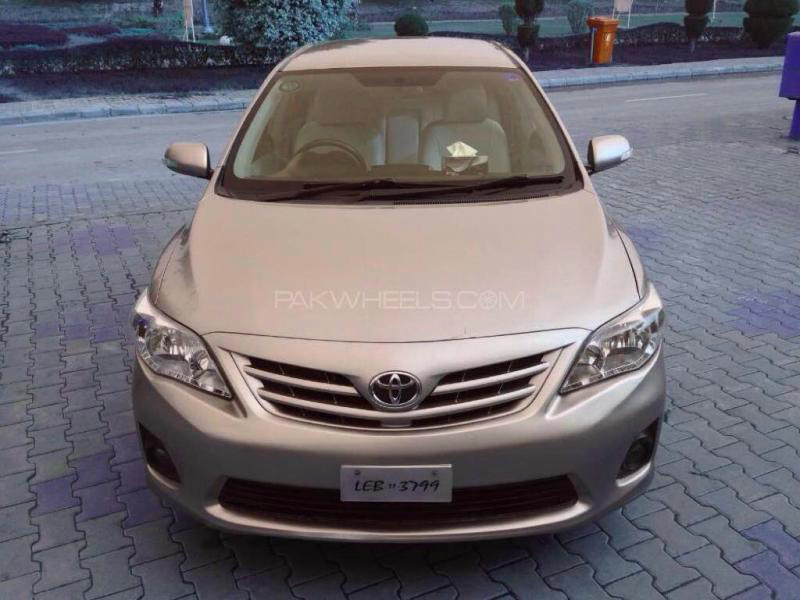

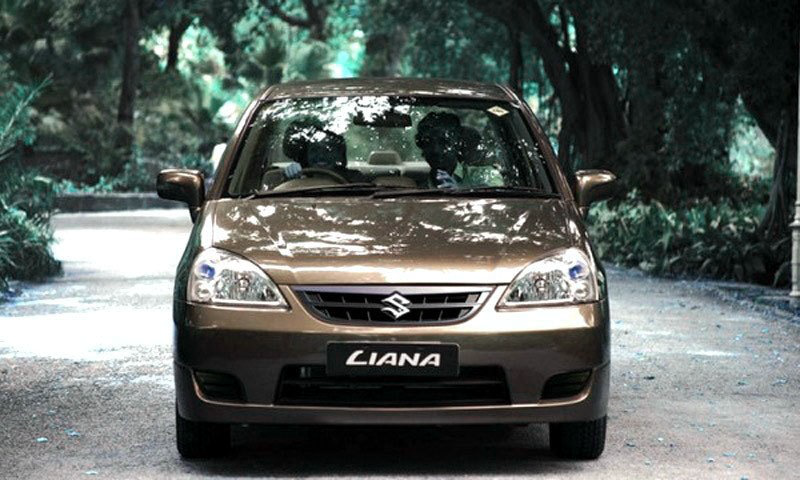

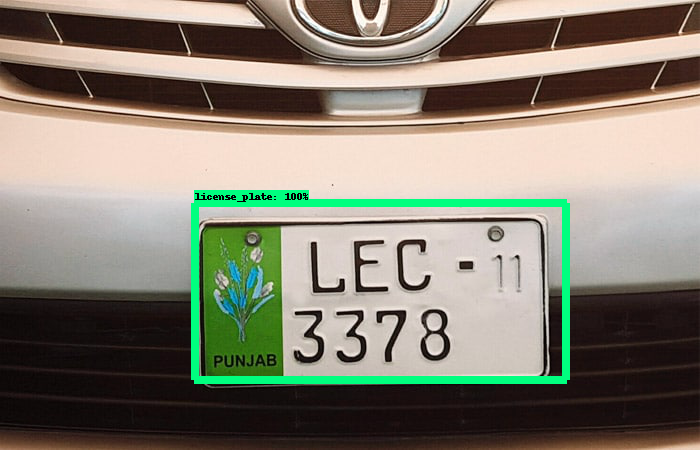

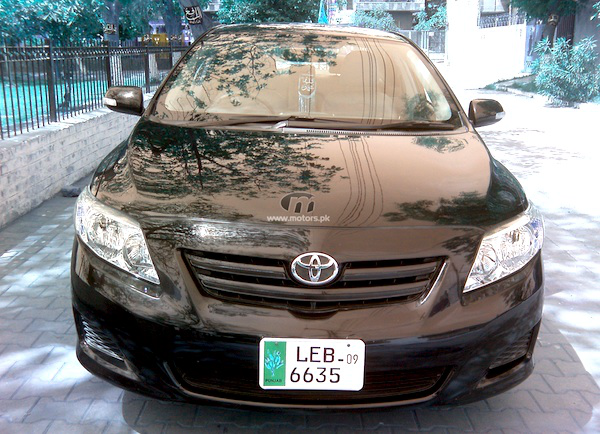

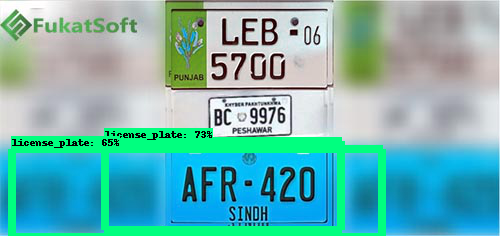

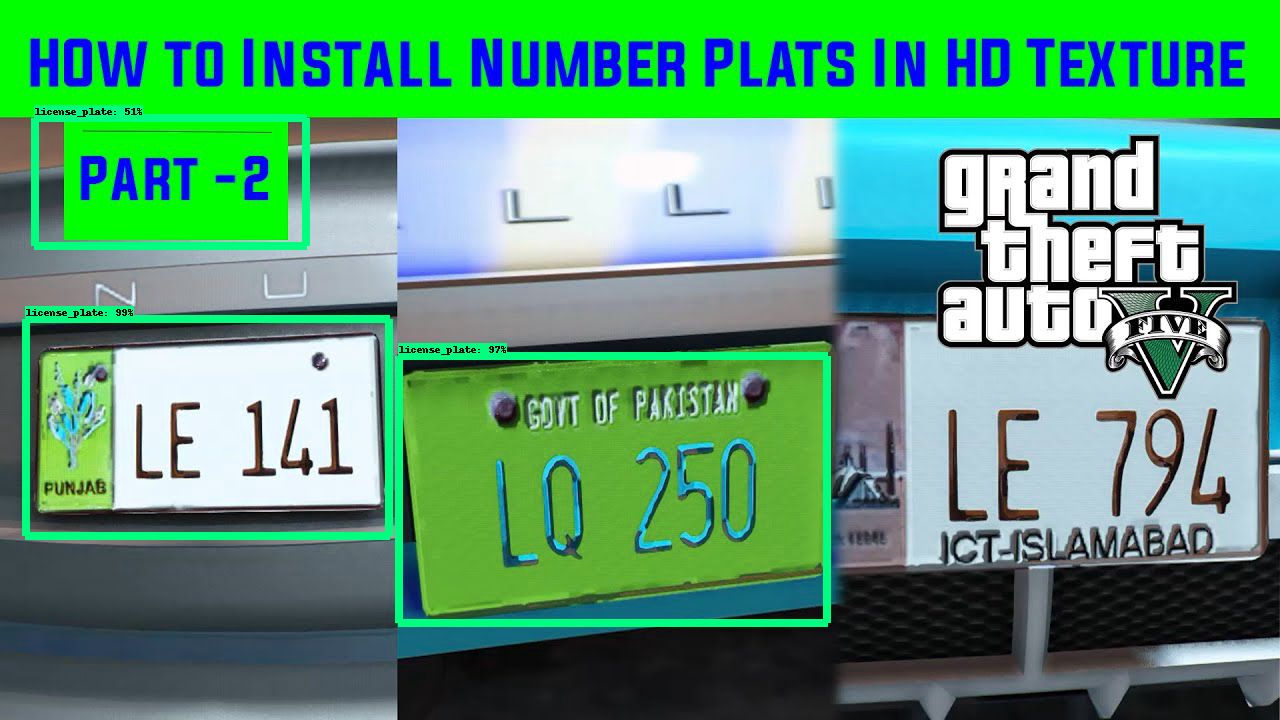

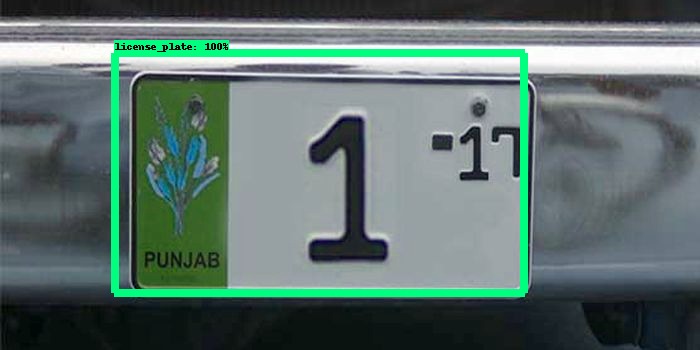

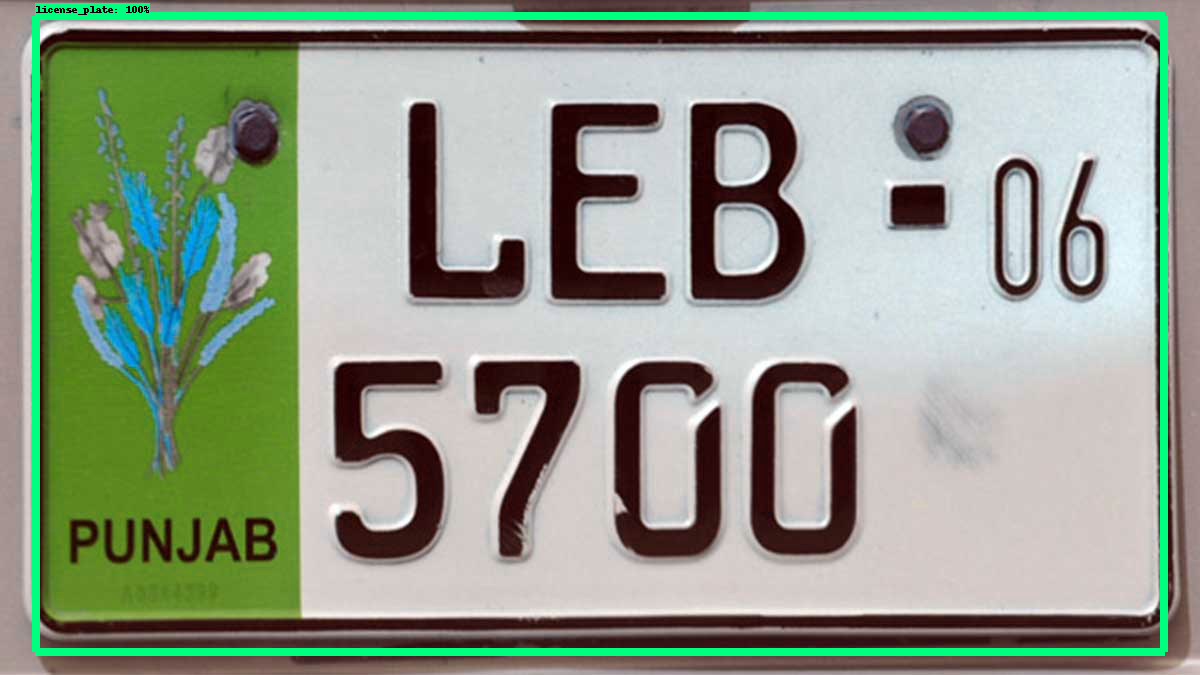

In [43]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      image_np = load_image_into_numpy_array(image)
      image_np_expanded = np.expand_dims(image_np, axis=0)
      image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
      boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
      scores = detection_graph.get_tensor_by_name('detection_scores:0')
      classes = detection_graph.get_tensor_by_name("detection_classes:0")
      num_detections = detection_graph.get_tensor_by_name('num_detections:0')
      (boxes, scores, classes, num_detections) = sess.run(
          [boxes, scores, classes, num_detections],
          feed_dict={image_tensor: image_np_expanded}
      )
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8
      )
      cv2_imshow(image_np)